In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

# from google.colab import drive

# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# COMPAS Dataset Error Analysis and Bias in Predictive Models

##Exercise 1: Loading and Preprocessing (COMPAS Data)
Load, clean, and preprocess the dataset to prepare it for subsequent analysis with a focus on error distribution.

####Exercise 1.1:
Load the COMPAS dataset ('compas-scores-two-years2.csv') using pandas.

*   Attempt the following on ('compas-scores-two-years-violent.csv') after completing the non-violent dataset.

In [ ]:
# Load dataset with read_csv
df = pd.read_csv('/content/drive/MyDrive/compas-scores-two-years2.csv')

####Exercise 1.2:
Print out the dimensions, column names, and datatypes of this dataset! Then print out the head to understand the dataset.


*   Understanding the shape, columns, and types helps determine the size of the dataset and understand which fields are relevant for our analysis.
*   This is crucial for identifying which columns might be useful in understanding bias.



In [ ]:
# Explore the data structure
print(df.shape)
print(df.columns)
print(df.dtypes)
print(df.head())

(7214, 25)
Index(['id', 'name', 'compas_screening_date', 'sex', 'dob', 'age', 'race',
       'juv_fel_count', 'decile_score', 'juv_misd_count', 'juv_other_count',
       'priors_count', 'days_b_screening_arrest', 'c_jail_in', 'c_jail_out',
       'c_case_number', 'c_offense_date', 'c_arrest_date',
       'c_days_from_compas', 'c_charge_degree', 'c_charge_desc', 'is_recid',
       'score_text', 'priors_count.1', 'two_year_recid'],
      dtype='object')
id                           int64
name                        object
compas_screening_date       object
sex                         object
dob                         object
age                          int64
race                        object
juv_fel_count                int64
decile_score                 int64
juv_misd_count               int64
juv_other_count              int64
priors_count                 int64
days_b_screening_arrest    float64
c_jail_in                   object
c_jail_out                  object
c_case_number      

####Exercise 1.3a:
Filter the data to remove irrelevant records:


*   Remove rows with `days_b_screening_arrest` outside of the range (-30, 30)
    *   The column `days_b_screening_arrest` represents the number of days between a person's arrest and when they were assessed by the COMPAS system.
    *   The COMPAS assessment is only relevant if it is done within a certain time window of the arrest, ideally around the time of the offense
    *   If the assessment is performed too long after (greater than 30 days) or before (-30 days) the actual arrest, it may not accurately reflect the current context of the offense, leading to unrealiable or incorrect risk scores.




In [ ]:
# Filter the data
# The DataFrame is filtered to keep only those rows where the
# days_b_screening_arrest value is between -30 and 30.
# This condition selects only relevant records.
df = df[(df['days_b_screening_arrest'] < 30) & (df['days_b_screening_arrest'] > -30)]
print(df.head())

   id              name compas_screening_date   sex        dob  age  \
0   1  miguel hernandez             8/14/2013  Male  4/18/1947   69   
1   3       kevon dixon             1/27/2013  Male  1/22/1982   34   
2   4          ed philo             4/14/2013  Male  5/14/1991   24   
5   7      marsha miles            11/30/2013  Male  8/22/1971   44   
6   8     edward riddle             2/19/2014  Male  7/23/1974   41   

               race  juv_fel_count  decile_score  juv_misd_count  ...  \
0             Other              0             1               0  ...   
1  African-American              0             3               0  ...   
2  African-American              0             4               0  ...   
5             Other              0             1               0  ...   
6         Caucasian              0             6               0  ...   

   c_case_number  c_offense_date  c_arrest_date c_days_from_compas  \
0  13011352CF10A       8/13/2013            NaN                1

####Exercise 1.3b:
Filter the data to remove irrelevant records:
*   Drop the rows where `is_recid` equals -1.
    *   The column `is_recid` is a flag indicating whether the individual reoffended (revidivated) within two years. A value of `-1` indicates that the data for this person is missing or oculd not be found by ProPublica (the source of the data).
    *   Records with `is_recid = -1` mean that we do not know whether the individual reoffended or not. Using incomplete or missing information can lead to skewed results, and these cases add uncertainty to the analysis.

In [ ]:
# Filter the data
# Rows with is_recid equal to -1 (which indicates missing data) are removed.
# Selects only the valid rows.
df = df[df['is_recid'] != -1]
print(df.head())

   id              name compas_screening_date   sex        dob  age  \
0   1  miguel hernandez             8/14/2013  Male  4/18/1947   69   
1   3       kevon dixon             1/27/2013  Male  1/22/1982   34   
2   4          ed philo             4/14/2013  Male  5/14/1991   24   
5   7      marsha miles            11/30/2013  Male  8/22/1971   44   
6   8     edward riddle             2/19/2014  Male  7/23/1974   41   

               race  juv_fel_count  decile_score  juv_misd_count  ...  \
0             Other              0             1               0  ...   
1  African-American              0             3               0  ...   
2  African-American              0             4               0  ...   
5             Other              0             1               0  ...   
6         Caucasian              0             6               0  ...   

   c_case_number  c_offense_date  c_arrest_date c_days_from_compas  \
0  13011352CF10A       8/13/2013            NaN                1

####Exercise 1.3c:
Filter the data to remove irrelevant records:
*   Remove rows where `c_charge_degree` is 'O' (ordinary traffic).
    * The `c_charge_degree` column indicates the severity of the charge. It contains values like 'F' (Felony), 'M' (Misdemeanor), and 'O' (Ordinary traffic offenses).
    * **Ordinary traffic offenses** do not usually result in jail time and are less likely to lead to reoffending that would justify the use of a complex risk assessment model like COMPAS.

In [ ]:
# Filter the data
# Rows where the charge degree is 'O' (ordinary traffic offenses) are removed.
# Excludes less severe offenses that are not relevant to the analysis.
df = df[df['c_charge_degree'] != 'O']
print(df.head())

   id              name compas_screening_date   sex        dob  age  \
0   1  miguel hernandez             8/14/2013  Male  4/18/1947   69   
1   3       kevon dixon             1/27/2013  Male  1/22/1982   34   
2   4          ed philo             4/14/2013  Male  5/14/1991   24   
5   7      marsha miles            11/30/2013  Male  8/22/1971   44   
6   8     edward riddle             2/19/2014  Male  7/23/1974   41   

               race  juv_fel_count  decile_score  juv_misd_count  ...  \
0             Other              0             1               0  ...   
1  African-American              0             3               0  ...   
2  African-American              0             4               0  ...   
5             Other              0             1               0  ...   
6         Caucasian              0             6               0  ...   

   c_case_number  c_offense_date  c_arrest_date c_days_from_compas  \
0  13011352CF10A       8/13/2013            NaN                1

####Exercise 1.4
Handle missing values


*   Drop rows that contain missing values (NA)



In [ ]:
# Drop rows with missing values
df = df.dropna()
print(df.head())

####Exercise 1.5:
Transform the risk score column into a new, simplified format. Create a new column that categorizes the risk score into binary outcomes: 'Low': 0, 'Medium': 1, 'High': 1
*   Transforming the `score_text` into a binary value allows us to perform more straightforward predictive analysis and assess whether the model is properly identifying high-risk individuals
*   Hint: create a column called 'score_binary', .replace() function replaces specific values in the DataFrame with new values

In [ ]:
# Create a binary column for the risk score
# The risk scores (e.g., 'Low', 'Medium', 'High') are converted into a binary
# format where 'Low' becomes 0 and both 'Medium' and 'High' become 1.

# The result is stored in a new column named score_binary.
df['score_binary'] = df['score_text'].replace({'Low': 0, 'Medium': 1, 'High': 1})
print(df.head())

   id              name compas_screening_date   sex        dob  age  \
0   1  miguel hernandez             8/14/2013  Male  4/18/1947   69   
1   3       kevon dixon             1/27/2013  Male  1/22/1982   34   
2   4          ed philo             4/14/2013  Male  5/14/1991   24   
5   7      marsha miles            11/30/2013  Male  8/22/1971   44   
6   8     edward riddle             2/19/2014  Male  7/23/1974   41   

               race  juv_fel_count  decile_score  juv_misd_count  ...  \
0             Other              0             1               0  ...   
1  African-American              0             3               0  ...   
2  African-American              0             4               0  ...   
5             Other              0             1               0  ...   
6         Caucasian              0             6               0  ...   

   c_offense_date  c_arrest_date  c_days_from_compas c_charge_degree  \
0       8/13/2013            NaN                 1.0          

<ipython-input-10-1b1512de44eb>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['score_binary'] = df['score_text'].replace({'Low': 0, 'Medium': 1, 'High': 1})


##Exercise 2: Confusion Matrix, Contingency Table, and Performance Metrics
Use COMPAS predictions to create a confusion matrix. Calculate accuracy, precision, recall, specificity, and F1 score using actual vs predicted calues.

####Exercise 2.1:
Create a Confusion Matrix. Import the `confusion_matrix` function from the `sklearn.metrics` module.
*   Then extract the actual labels (`y_actual`) and the predicted labels (`y_pred`) from your DataFrame.
    * `y_actual`: This should be the actual outcome, which tells if a person actually recidivated (`two_year_recid` column).
    * `y_pred`: This should be the predicted outcome from the model (`score_binary` column).

In [ ]:
# Import here
from sklearn.metrics import confusion_matrix

# Define actual and predicted values
# y_actual contains the true recidivism outcomes (from the two_year_recid column),
# and y_pred contains the predicted outcomes (from the score_binary column).
y_actual = df['two_year_recid']
y_pred = df['score_binary']

# Create a confusion matrix using the function you've imported
# This function from scikit-learn computes the confusion matrix,
# which summarizes correct and incorrect predictions.
cm = confusion_matrix(y_actual, y_pred)
print("Confusion Matrix:\n", cm)
# print(y_actual.head())  # Print the first few rows of y_actual
# print(y_pred.head())    # Print the first few rows of y_pred


Confusion Matrix:
 [[2340 1016]
 [1074 1729]]


##Exercise 2.2:
Define a Contingency Table
*   Extract values for True Negatives (`TN`), False Positives (`FP`), False Negatives (`FN`), and True Positives (`TP`) from the confusion matrix. Use these values to create a contingency table for easier analysis.

The contingency table provides a detailed breakdown of the model's prediction quality:

- True Negatives (`TN`): Correctly predicted non-recidivists.
- False Positives (`FP`): Incorrectly predicted as high-risk (non-recidivists labeled as recidivists).
- False Negatives (`FN`): Incorrectly predicted as low-risk (recidivists labeled as non-recidivists).
- True Positives (`TP`): Correctly predicted recidivists.

In [ ]:
# Extract and create contingency table values
# The confusion matrix is originally a 2x2 array, with the following structure:
# [[True Negative (TN), False Positive (FP)],
#  [False Negative (FN), True Positive (TP)]]
# .ravel() makes it easier to extract these four values (left to right) at once.

tn, fp, fn, tp = cm.ravel()
# ^^ Flattens the 2x2 confusion matrix into four separate variables representing
# True Negatives, False Positives, False Negatives, and True Positives.

# Create a contingency table for easier analysis.
# This table helps us understand the types of correct and incorrect predictions made by the model.
# A new DataFrame is created to neatly display these values, which is useful for further analysis.
contingency_table = pd.DataFrame({'True Negative': [tn], 'False Positive': [fp], 'False Negative': [fn], 'True Positive': [tp]})
print("Contingency Table:\n", contingency_table)

Contingency Table:
    True Negative  False Positive  False Negative  True Positive
0           2340            1016            1074           1729


####Exercise 2.3:
Calculate Performance Metrics. Import functions to calculate accuracy, precision, recall, and F1 score from scikit-learn.
*   Calculate the **accuracy** of the model by comparing `y_actual` and `y_pred`.
    * Accuracy gives a general overview of the model's performance, indicating how often it correctly predicted recidivism versus non-recidivism.
*   Calculate the **precision** and recall to understand the quality of the model’s positive predictions.
    * Precision is critical when we want to minimize false positives, for example, when misclassifying someone as high-risk unjustly (which could lead to harsher treatment).
    * Recall is important when we want to ensure we identify as many actual positives as possible, such as correctly identifying individuals who are likely to reoffend.
* Use the values from the confusion matrix to calculate **specificity** (`True Negative`/(`True Negative` + `False Positive`).
    * Specificity tells us how well the model identifies actual non-recidivists, minimizing the risk of wrongly labeling people as high-risk when they are not.
* Calculate the **F1 score** for a balanced measure of the model’s performance.
    * The F1 score is useful when the balance between precision and recall is crucial. For instance, if false positives and false negatives have serious real-world consequences, this metric helps to assess overall balance.

In [ ]:
# Import functions here
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy with the function you imported
accuracy = accuracy_score(y_actual, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Calculate precision, recall
precision = precision_score(y_actual, y_pred)
recall = recall_score(y_actual, y_pred)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

# Calculate specificity
specificity = tn / (tn + fp)
print(f'Specificity: {specificity:.2f}')

# Calculate F1 Score
f1 = f1_score(y_actual, y_pred)
print(f'F1 Score: {f1:.2f}')

# These metrics are computed using scikit-learn’s built-in functions.
# They measure various aspects of the model's performance.

# Practice calculating these manually using the formulas found in the slides!

Accuracy: 0.66
Precision: 0.63
Recall: 0.62
Specificity: 0.70
F1 Score: 0.62


##Exercise 3: Error Distribution Analysis Across Demographics
Compare the rates of False Positives and False Negatives between demographic groups (e.g., race and gender). Plot these differences using histograms or bar charts with Seaborn.

####Exercise 3.1:
Create new columns in your DataFrame to identify False Positives and False Negatives.
*   **False Positive (FP)**: When the model predicts someone will reoffend (high-risk), but they do not actually reoffend.
*   **False Negative (FN)**: When the model predicts someone will not reoffend (low-risk), but they do actually reoffend.

In [ ]:
# Add columns to identify False Positives and False Negatives
# Boolean conditions are used to flag false positives
 # (predicted high-risk but did not reoffend) and
 # false negatives (predicted low-risk but did reoffend).
df['false_positive'] = ((y_pred == 1) & (y_actual == 0)).astype(int)
df['false_negative'] = ((y_pred == 0) & (y_actual == 1)).astype(int)

# .astype(int) Converts the boolean result to integers (0 or 1) for aggregation.

####Exercise 3.2:
Use the newly created `'false_positive'` and `'false_negative'` columns to calculate the average rates for each demographic group.
*   Group the data by `'race'` and calculate the mean of `'false_positive'` and `'false_negative'`.

In [ ]:
# Calculate false positive and false negative rates by race
# The DataFrame is grouped by the race column.
fp_rates = df.groupby('race')['false_positive'].mean()
fn_rates = df.groupby('race')['false_negative'].mean()
# Taking the mean of the error indicator columns gives the proportion
# (rate) of false positives and false negatives for each racial group.

# Print the rates to understand the differences
print("False Positive Rates by Race:\n", fp_rates)
print("False Negative Rates by Race:\n", fn_rates)

False Positive Rates by Race:
 race
African-American    0.202081
Asian               0.064516
Caucasian           0.133652
Hispanic            0.122047
Native American     0.272727
Other               0.081871
Name: false_positive, dtype: float64
False Negative Rates by Race:
 race
African-American    0.149117
Asian               0.096774
Caucasian           0.194749
Hispanic            0.214567
Native American     0.000000
Other               0.236842
Name: false_negative, dtype: float64


####Exercise 3.3:
Use Seaborn's barplot to create a bar chart of the false positive rates by race.


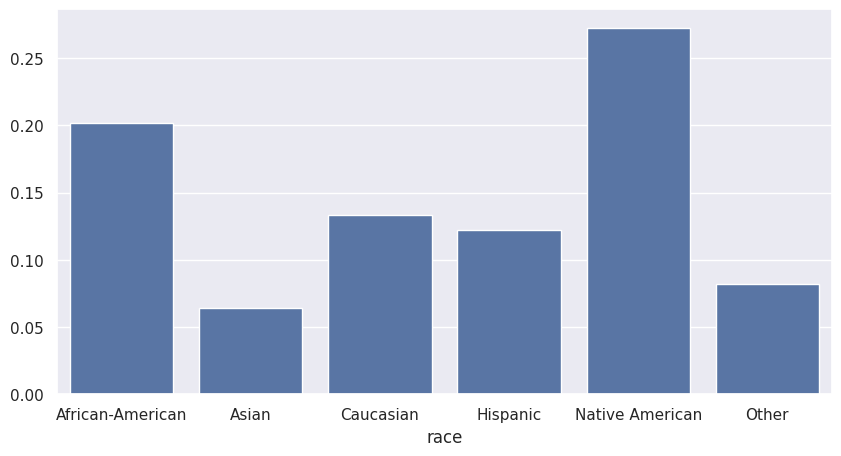

In [ ]:
# Plot FP rates by race using Seaborn
# Hint: (x: index, y: values)
sns.set(rc={"figure.figsize": (10, 5)})  # Set figure size directly in Seaborn
sns.barplot(x=fp_rates.index, y=fp_rates.values)
sns.set_style("whitegrid")  # Optional: Set the style for better readability
# These functions adjust the plot’s size and style for clarity.

# Creates a bar chart where the x-axis shows the
# racial groups and the y-axis shows the false positive rates.

####Exercise 3.4:
Create a bar chart using Seaborn to visualize false negative rates by race, similar to how false positive rates were plotted.

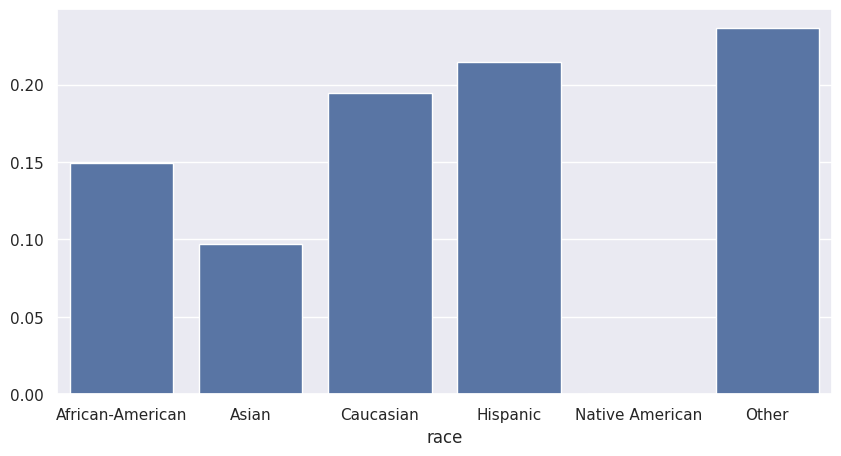

In [ ]:
# Plot FN rates by race using Seaborn
# Hint: (x: index, y: values)
sns.set(rc={"figure.figsize": (10, 5)})  # Set figure size directly in Seaborn
sns.barplot(x=fn_rates.index, y=fn_rates.values)
sns.set_style("whitegrid")  # Optional: Set the style for better readability

# This cell creates a bar plot for false negative rates across racial groups.
# It highlights whether certain groups are being under-classified as low-risk when they are actually high-risk.

##Exercise 4: Bayes' Rule in Practice
Calculate the posterior probability that an individual is a recidivist given a COMPAS high-risk score. Consider different scenarios where priors (such as prevalence of recidivism) vary.

####Exercise 4.1: Understand and Calculate the Prevalence of Recidivism (P(A))
Start by calculating the prevalence of recidivism in the dataset. This is the proportion of individuals who actually reoffended within two years, denoted by **P(A)**
*   **Prevalence** represents the **prior probability** that an individual will reoffend without considering their COMPAS score

In [ ]:
# Calculate the prevalence of recidivism (P(A))
# The mean of the two_year_recid column gives the overall proportion
# of individuals who reoffended (i.e., the prevalence).
# This value represents the prior probability of recidivism before considering the COMPAS risk score.
prevalence = df['two_year_recid'].mean()
print(f"Prevalence (P(A)) of Recidivism: {prevalence:.2f}")

Prevalence (P(A)) of Recidivism: 0.46


####Exercise 4.2: Calculate the Probability of Receiving a High-Risk Score Given Recidivism (P(B|A))
Calculate the conditional probability than an individual received a high-risk score given that they reoffended. This is denoted as **P(B|A)**.
*   Filter the dataset to only include rows where the individual reoffended (`two_year_recid` equals 1), and then calculate the proportion of those who were labeled as high-risk (`score_binary` equals 1).

In [ ]:
# Calculate the probability of a high-risk score given recidivism (P(B|A))
# The mean of score_binary in this subset gives P(B|A), the probability that someone who reoffended was given a high-risk score.
p_high_given_recid = df[df['two_year_recid'] == 1]['score_binary'].mean()
print(f"Probability of High-Risk Score given Recidivism (P(B|A)): {p_high_given_recid:.2f}")

Probability of High-Risk Score given Recidivism (P(B|A)): 0.62


####Exercise 4.3: Calculate the Probability of Receiving a High-Risk Score (P(B))
Calculate the probability that an individual receives a high-risk score in general, regardless of whether they reoffended. This is denotes as **P(B)**
*   This represents how often the model classifies individuals as high-risk acorss the whole dataset.

In [ ]:
# Calculate the probability of receiving a high-risk score (P(B))
# The mean of the score_binary column over the entire dataset gives P(B), the overall probability of a high-risk prediction.
p_high = df['score_binary'].mean()
print(f"Probability of Receiving High-Risk Score (P(B)): {p_high:.2f}")

Probability of Receiving High-Risk Score (P(B)): 0.45


####Exercise 4.4: Calculate the Posterior Probability (P(A|B)) Instruction
Use Bayes' Rule to calculate the posterior probability that an individual actually reoffended given that they received a high-risk score. This is denoted as **P(A|B)**

Apply Bayes' Rule: $P(A|B) = \frac{P(B|A)\cdot P(A)}{P(B)}$

In [ ]:
# Calculate the posterior probability using Bayes' Rule (P(A|B))
# Baye's Rule formula is used to update the probability of recidivism (A) given a high-risk score (B).
# The result gives the probability that an individual reoffended, given that they were labeled high-risk by COMPAS.
posterior = (p_high_given_recid * prevalence) / p_high
print(f'Posterior Probability of Recidivism given High-Risk Score (P(A|B)): {posterior:.2f}')

Posterior Probability of Recidivism given High-Risk Score (P(A|B)): 0.63


##Exercise 5: Fairness Analysis
Create fairness metrics based on demographic parity or equal opportunity. Determine if the model's predictions meet fairness criteria across racial groups.

####Exercise 5.1:
Group the dataset by race to calculate the proportion of individuals who received a high-risk score within each racial group.
*   Calculate the positive prediction rate for each group to assess if each demographic is equally likely to be labeled as high risk.

In [ ]:
# Calculate the rate of positive predictions by race
# Hint: calculating the mean gives you the proportion of individuals in each group(by) who were labeled as high-risk
# (score_binary equal to 1)
positive_rate = df.groupby('race')['score_binary'].mean()
print("Positive Prediction Rate by Race:\n", positive_rate)

Positive Prediction Rate by Race:
 race
African-American    0.575662
Asian               0.225806
Caucasian           0.330788
Hispanic            0.277559
Native American     0.727273
Other               0.204678
Name: score_binary, dtype: float64


####Exercise 5.2:
Use Seaborn to create a bar chart that visualizes the positive prediction rates for each racial group.

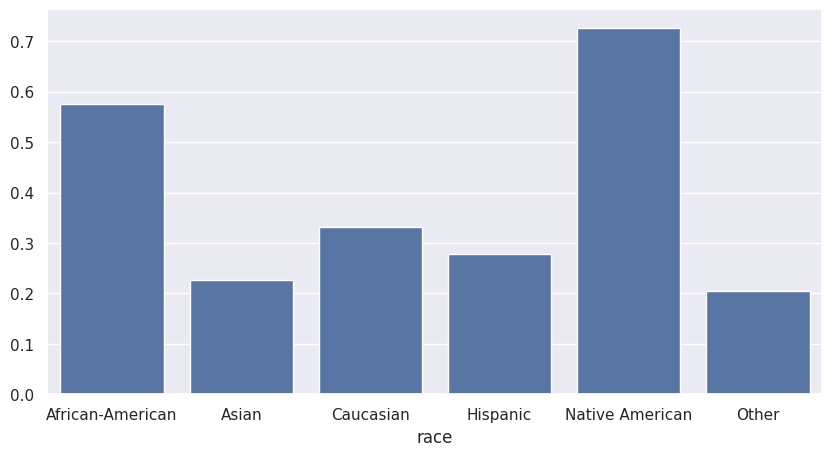

In [ ]:
# Visualize positive prediction rates by race using Seaborn
sns.set(rc={"figure.figsize": (10, 5)})  # Set the figure size
sns.barplot(x=positive_rate.index, y=positive_rate.values)
sns.set_style("whitegrid")  # Optional: Set the plot style

####Exercise 5.3:
To evaluate equal opportunity, calculate the True Positive Rate (TPR) for each racial group.
*   First, add columns to the dataset that indicate True Positives (where the model correctly predicts recidivism).
*   Then group by race to calculate the TPR for each group.

In [ ]:
# Hint: TPR formula is TP / (TP + FN), where:
# TP (True Positive): Correctly predicted that an individual will reoffend.
# FN (False Negative): Missed prediction—did not predict reoffend but the individual did reoffend.

# Use .agg() to aggregate values across groups and calculate the necessary sums for each demographic.

# Step 1: Add a column for True Positives: actual = 1 and predicted = 1
df['true_positive'] = ((y_actual == 1) & (y_pred == 1)).astype(int)

# Step 2: Add a column for False Negatives: actual = 1 and predicted = 0
df['false_negative'] = ((y_actual == 1) & (y_pred == 0)).astype(int)

# Step 3: Group by race and calculate the sum of True Positives and False Negatives for each group
grouped = df.groupby('race').agg({'true_positive': 'sum', 'false_negative': 'sum'})

# Step 4: Calculate TPR for each race: TPR = TP / (TP + FN)
grouped['TPR'] = grouped['true_positive'] / (grouped['true_positive'] + grouped['false_negative'])

# Print the True Positive Rate for each race
print("True Positive Rate (TPR) by Race:\n", grouped['TPR'])

# New columns are created to mark when the COMPAS prediction correctly identifies recidivists (TP) and when it misses them (FN).
# The DataFrame is grouped by race and sums of TP and FN are computed.
# The true positive rate is computed as TPR = TP/TP+FN

True Positive Rate (TPR) by Race:
 race
African-American    0.714717
Asian               0.625000
Caucasian           0.503045
Hispanic            0.420213
Native American     1.000000
Other               0.341463
Name: TPR, dtype: float64


####Exercise 5.4:
Use Seaborn to create a bar chart that visualizes the True Positive Rate (TPR) for each racial group.

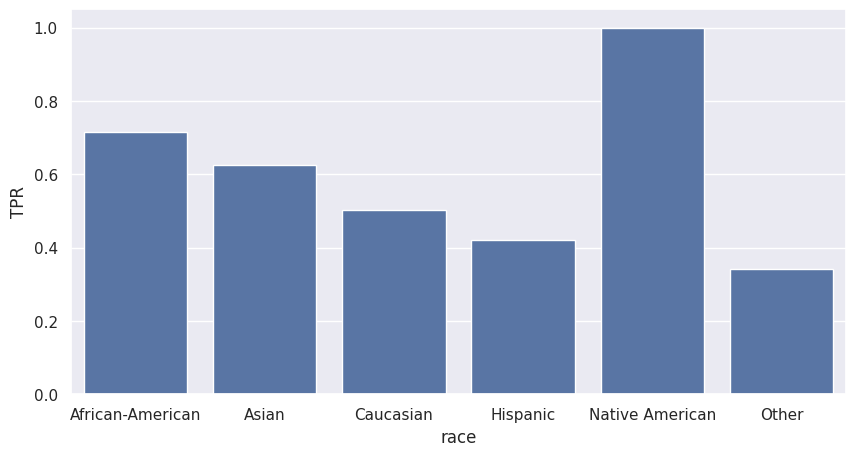

In [ ]:
# Visualize the True Positive Rate by race using Seaborn
sns.set(rc={"figure.figsize": (10, 5)})  # Set the figure size
sns.barplot(x=grouped.index, y=grouped['TPR'])
sns.set_style("whitegrid")  # Optional: Set the plot style for readability

##Exercise 6: Length of Stay Correlation Analysis
Calculate the length of jail stay and analyze its correlation with COMPAS scores. Discuss the potential biases introduced due to correlations between socioeconomic status and length of stay.

####Exercise 6.1:
Convert the jail entry and exit dates into a datetime format.
*   Calculate the length of stay by subtracting the entry date from the exit date. Store this in a new column called `'length_of_stay'`.

In [ ]:
# Hint: use pd.to_datetime() to convert strings into datetime format
# so you can perform arithmetic operations like calculating the number of days

# .dt.days extracts the length in days, making it easy to analyze.

# Convert jail entry and exit dates to datetime format
df['c_jail_in'] = pd.to_datetime(df['c_jail_in'])
df['c_jail_out'] = pd.to_datetime(df['c_jail_out'])

# Calculate length of stay in jail and store it in a new column
df['length_of_stay'] = (df['c_jail_out'] - df['c_jail_in']).dt.days
print(df[['c_jail_in', 'c_jail_out', 'length_of_stay']].head())  # Verify the result


            c_jail_in          c_jail_out  length_of_stay
0 2013-08-13 06:03:00 2013-08-14 05:41:00               0
1 2013-01-26 03:45:00 2013-02-05 05:36:00              10
2 2013-04-13 04:58:00 2013-04-14 07:02:00               1
5 2013-11-30 04:50:00 2013-12-01 12:28:00               1
6 2014-02-18 05:08:00 2014-02-24 12:18:00               6


####Exercise 6.2:
Calculate the correlation between the `'length_of_stay'` column and the `'decile_score'` column.
*   Print the result to determine if there is any positive or negative correlation.
*   A value close to 1 suggests a strong positive correlation (i.e., as one variable increases, so does the other).
*   A value close to -1 suggests a strong negative correlation.
*   A value close to 0 suggests no correlation.


In [ ]:
# Calculate correlation between length of stay and COMPAS decile score
correlation = df['length_of_stay'].corr(df['decile_score'])
print(f'Correlation between Length of Stay and COMPAS Score: {correlation:.2f}')

# The .corr() method calculates the Pearson correlation between two numerical columns (here, length of stay and COMPAS decile score).
# A correlation close to 1 or -1 indicates a strong relationship, while a value near 0 suggests little to no linear relationship.

Correlation between Length of Stay and COMPAS Score: 0.21


####Exercise 6.4:
Create a scatter plot using Seaborn to visualize the relationship between length of stay and COMPAS score.
*   Fit a regression line to observe the potential trend between length of stay and risk score.

<Axes: xlabel='length_of_stay', ylabel='decile_score'>

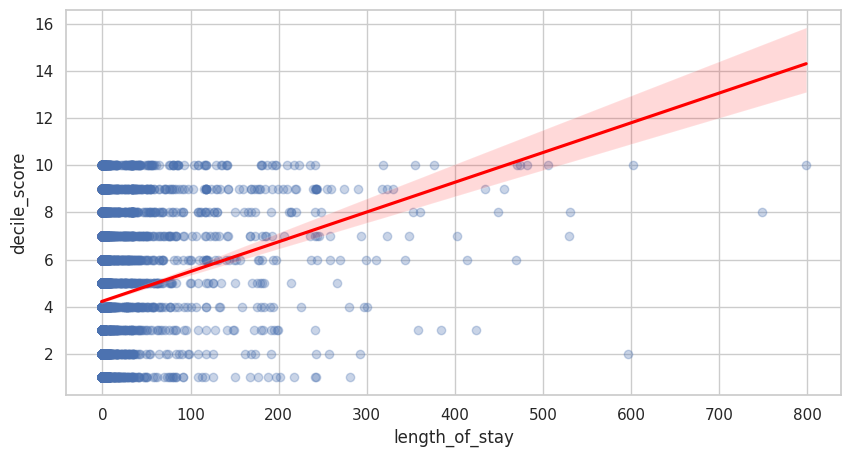

In [ ]:
# Import Seaborn (since we are only using Seaborn)
import seaborn as sns

# Create a scatter plot with regression line to visualize the relationship between length of stay and COMPAS score
sns.set(rc={"figure.figsize": (10, 5)})  # Set figure size directly in Seaborn
sns.set_style("whitegrid")  # Optional: Set the style for a clean, readable plot

# Create the plot
sns.regplot(x='length_of_stay', y='decile_score', data=df, scatter_kws={'alpha': 0.3}, line_kws={"color": "red"})

# This creates a scatter plot with a fitted regression line, allowing you to see both the raw data points and the overall trend.


#Congrats! You've finished Week 3!
## Final Note:
Evaluating bias and fairness in predictive models is a crucial step in ensuring that AI and machine learning tools are used ethically and equitably. By systematically understanding and addressing these biases, we can contribute to building more fair and responsible AI systems that benefit all individuals, regardless of their demographic background.